In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst

In [2]:
param_est = OnlineParamEst()
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_tracking_with_DEKA()
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_tracking_with_RLS()
x_ekf,  u_ekf,  theta_ekf,  theta_hat_ekf  = param_est.simulate_quadrotor_tracking_with_EKF()

# Suppose x_deka, x_rls each have shape (N, 3) for position in x,y,z.
# Also assume you have a desired (reference) trajectory x_des, shape (N, 3).
num_points = 600
angles = np.linspace(0, 6*np.pi, num_points, endpoint=False)
# Create the figure-8 in the XY-plane
x = np.sin(angles)
y = np.sin(2 * angles)
z = np.zeros_like(x)  # Initially flat in XY-plane

# Stack as a (3, num_points) matrix
traj = np.vstack((x, y, z))  # Shape: (3, num_points)

# Define rotation matrix (tilt around the Y-axis)
rot_ang= np.radians(30)  # Tilt angle in degrees
R = np.array([
    [np.cos(rot_ang), 0, np.sin(rot_ang)],  # Rotation matrix for X-Z plane
    [0, 1, 0],  # Keep Y unchanged
    [-np.sin(rot_ang), 0, np.cos(rot_ang)]
])

# Apply rotation
traj_rotated = (R @ traj).T  # Matrix multiplication
x_des = traj.T  # Transpose back to original shape
# 2) Plot x, y, z positions for DEKA vs RLS vs desired
t = np.arange(len(x_deka))  # time steps 0..N-1


Perturbed Intitial State: 
[0.     0.     0.     0.7071 0.7071 0.     0.     0.     0.     0.
 0.     0.     0.    ]
exited at 0.014047838650943497 in 23 iterations
step:  0 

exited at 0.01535407261622845 in 0 iterations
step:  1 

exited at 0.04730445381676804 in 23 iterations
step:  2 

exited at 0.028213279745960752 in 0 iterations
step:  3 

exited at 0.04684482806516572 in 0 iterations
step:  4 

exited at 0.03103727556945904 in 0 iterations
step:  5 

exited at 0.023093683418969946 in 0 iterations
step:  6 

exited at 0.02410399588017317 in 0 iterations
step:  7 

exited at 0.01480165417961198 in 0 iterations
step:  8 

max iter reached
step:  9 

exited at 0.013991117452466959 in 34 iterations
step:  10 

exited at 0.0180496414098084 in 0 iterations
step:  11 

max iter reached
step:  12 

exited at 0.01126186799393531 in 43 iterations
step:  13 

exited at 0.03336576652459998 in 0 iterations
step:  14 

exited at 0.02581168727867985 in 0 iterations
step:  15 

exited at 0.0428

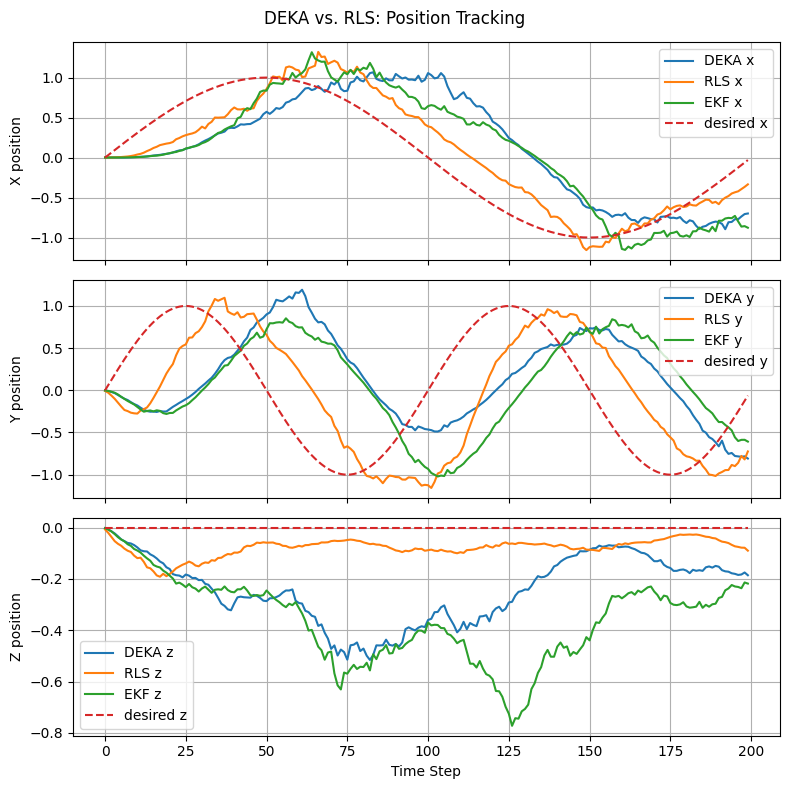

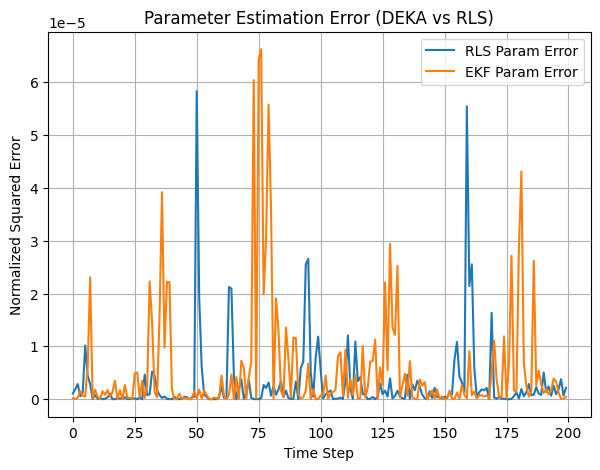

In [ ]:
x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_ekf   = [row[0] for row in x_ekf]
x_pos_des   = [row[0] for row in x_des][:200]
y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_ekf   = [row[1] for row in x_ekf]
y_pos_des   = [row[1] for row in x_des][:200]
z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_ekf   = [row[2] for row in x_ekf]
z_pos_des   = [row[2] for row in x_des][:200]

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_ekf)
theta_ekf_array = np.array(theta_ekf)

fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# X position
axs[0].plot(t, x_pos_deka, label='DEKA x')
axs[0].plot(t, x_pos_rls, label='RLS x')
axs[0].plot(t, x_pos_ekf, label='EKF x')
axs[0].plot(t, x_pos_des, '--', label='desired x')
axs[0].set_ylabel('X position')
axs[0].legend()
axs[0].grid(True)

# Y position
axs[1].plot(t, y_pos_deka, label='DEKA y')
axs[1].plot(t, y_pos_rls, label='RLS y')
axs[1].plot(t, y_pos_ekf, label='EKF y')
axs[1].plot(t, y_pos_des, '--', label='desired y')
axs[1].set_ylabel('Y position')
axs[1].legend()
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, label='DEKA z')
axs[2].plot(t, z_pos_rls, label='RLS z')
axs[2].plot(t, z_pos_ekf, label='EKF z')
axs[2].plot(t, z_pos_des, '--', label='desired z')
axs[2].set_xlabel('Time Step')
axs[2].set_ylabel('Z position')
axs[2].legend()
axs[2].grid(True)

fig.suptitle('DEKA vs. RLS: Position Tracking')
plt.tight_layout()
plt.show()

# 3) Compute and plot normalized squared error of parameter estimates
#    E.g. if theta_history is shape (N, p), we can do:
#    param_error = sum((theta_hat - theta)^2) / sum(theta^2), per time step.

param_error_deka =np.sum((theta_hat_deka_array - theta_deka_array)**2, axis=1) \
                   / np.sum(theta_deka_array**2, axis=1)
param_error_rls  = np.sum((theta_hat_rls_array  - theta_rls_array )**2, axis=1) \
                   / np.sum(theta_rls_array**2, axis=1)
param_error_ekf  = np.sum((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1) \
                   / np.sum(theta_ekf_array**2, axis=1)
# For each time i, compute MSE across parameters
mse_deka_time = np.mean((theta_hat_deka_array - theta_deka_array)**2, axis=1)
mse_rls_time  = np.mean((theta_hat_rls_array  - theta_rls_array )**2, axis=1)
mse_ekf_time  = np.mean((theta_hat_ekf_array  - theta_ekf_array )**2, axis=1)

plt.figure(figsize=(7,5))
plt.plot(t, mse_deka_time, label='DEKA Param Error')
plt.plot(t, mse_rls_time,  label='RLS Param Error')
plt.plot(t, mse_ekf_time,  label='EKF Param Error')

plt.xlabel('Time Step')
plt.ylabel('Normalized Squared Error')
plt.title('Parameter Estimation Error (DEKA vs RLS)')
plt.grid(True)
plt.legend()
plt.show()


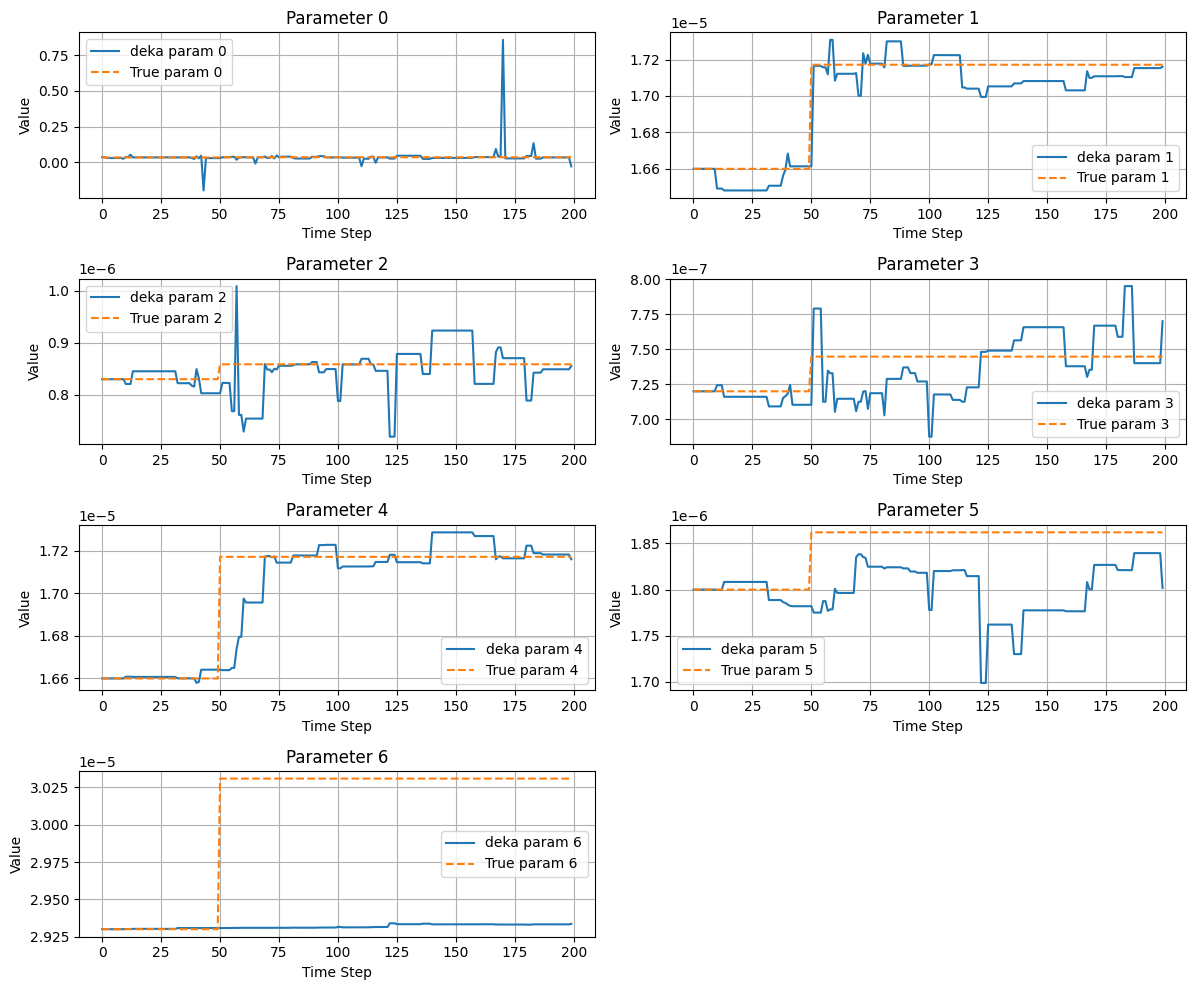

In [6]:

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(7):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)

plt.tight_layout()
plt.show()


## Simulate 100 times to obtain average mse comparison 